In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')

In [0]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [0]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


## EDA

In [0]:
data['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

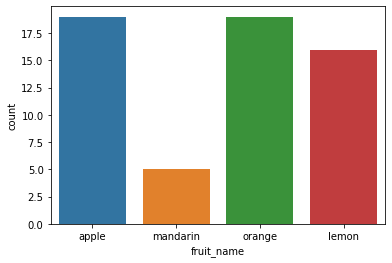

In [0]:
sns.countplot(x=data['fruit_name'])

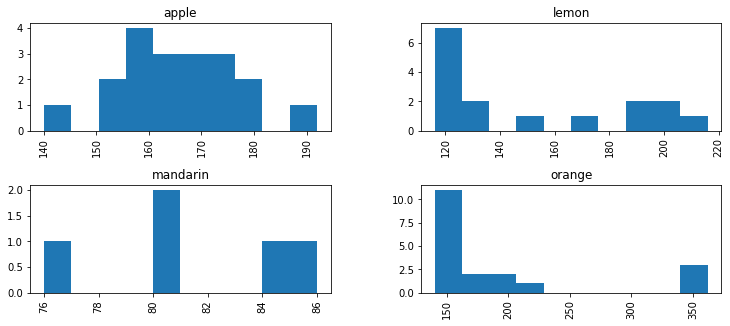

In [0]:
data.hist(column='mass', by='fruit_name',figsize=(12,5))
plt.show()

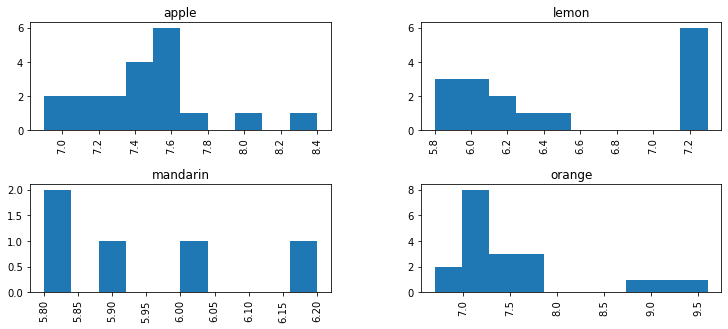

In [0]:
data.hist(column='width', by='fruit_name',figsize=(12,5))
plt.show()

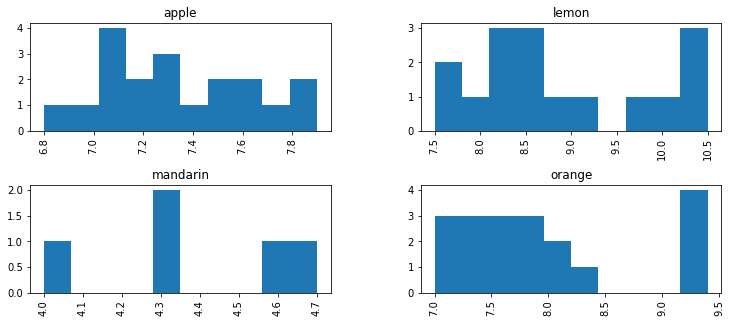

In [0]:
data.hist(column='height', by='fruit_name',figsize=(12,5))
plt.show()

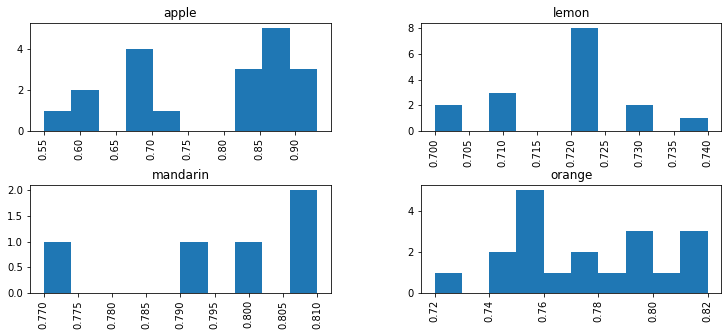

In [0]:
data.hist(column='color_score', by='fruit_name',figsize=(12,5))
plt.show()

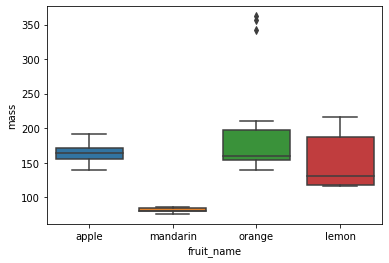

In [0]:
sns.boxplot(x='fruit_name',y='mass',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


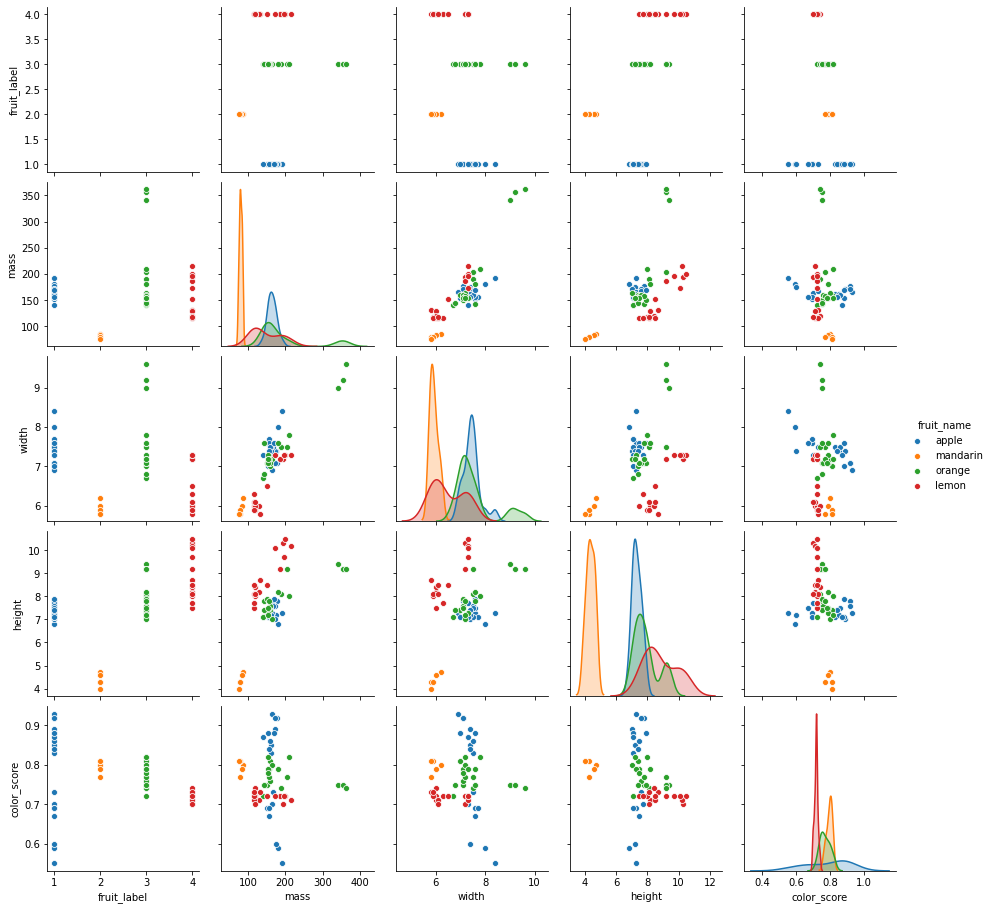

In [0]:
sns.pairplot(data,hue='fruit_name')

In [0]:
data.groupby('fruit_name').mean()

,fruit_label,mass,width,height,color_score
fruit_name,,,,,
apple,1.0,165.052632,7.457895,7.342105,0.783684
lemon,4.0,150.000000,6.512500,8.856250,0.718125
mandarin,2.0,81.200000,5.940000,4.380000,0.796000
orange,3.0,193.789474,7.557895,7.936842,0.771053


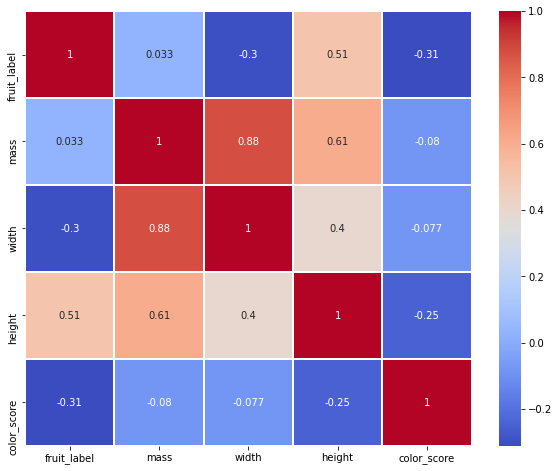

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

## Data Preprocessing

In [0]:
x = data.drop(['fruit_label','fruit_name','fruit_subtype'],axis=1)

y = data['fruit_label']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [0]:
# scale features
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Model 1 : Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Mean Accuracy of Logistic regression classifier on training set
logreg.score(X_train, y_train)

0.6595744680851063

In [0]:
# Mean Accuracy of Logistic regression classifier on test set
logreg.score(X_test, y_test)

0.75

In [0]:
logreg_pred = logreg.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           3       0.75      0.60      0.67         5
           4       1.00      1.00      1.00         3

    accuracy                           0.75        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.76      0.75      0.75        12



In [0]:
print(confusion_matrix(y_test, logreg_pred))

[[3 1 0]
 [2 3 0]
 [0 0 3]]


## Model 2 : Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Mean Accuracy of Decision Tree classifier on training set
dtc.score(X_train, y_train)

1.0

In [0]:
# Mean Accuracy of Decision Tree classifier on testing set
dtc.score(X_test, y_test)

0.9166666666666666

In [0]:
dtc_pred = dtc.predict(X_test)

In [0]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12



In [0]:
print(confusion_matrix(y_test, dtc_pred))

[[4 0 0]
 [1 4 0]
 [0 0 3]]


## Model 3 : Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=4)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Mean Accuracy of Random Forest classifier on training set
rfc.score(X_train, y_train)

0.9574468085106383

In [0]:
# Mean Accuracy of Random Forest classifier on testing set
rfc.score(X_test, y_test)

0.8333333333333334

In [0]:
rfc_pred = rfc.predict(X_test)

In [0]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         3

    accuracy                           0.83        12
   macro avg       0.85      0.85      0.85        12
weighted avg       0.83      0.83      0.83        12



In [0]:
print(confusion_matrix(y_test, rfc_pred))

[[3 1 0]
 [1 4 0]
 [0 0 3]]


## Model 4 : K-Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Mean Accuracy of KNN on training set
knn.score(X_train, y_train)

1.0

In [0]:
# Mean Accuracy of KNN on testing set
knn.score(X_test, y_test)

0.9166666666666666

In [0]:
knn_pred = knn.predict(X_test)

In [0]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12



In [0]:
print(confusion_matrix(y_test, knn_pred))

[[4 0 0]
 [1 4 0]
 [0 0 3]]


#### Choosing k

In [0]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

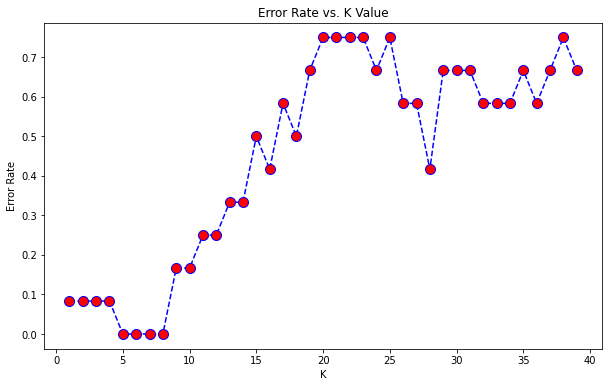

In [0]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
# choose k = 5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Mean Accuracy of KNN on training set
knn.score(X_train, y_train)

0.9574468085106383

In [0]:
# Mean Accuracy of KNN on testing set
knn.score(X_test, y_test)

1.0

In [0]:
knn_pred = knn.predict(X_test)

In [0]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [0]:
print(confusion_matrix(y_test, knn_pred))

[[4 0 0]
 [0 5 0]
 [0 0 3]]


## Model 5 : Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Mean Accuracy of Gaussian NB on training set
nb.score(X_train, y_train)

0.851063829787234

In [0]:
# Mean Accuracy of Gaussian NB on testing set
nb.score(X_test, y_test)

0.8333333333333334

In [0]:
nb_pred = nb.predict(X_test)

In [0]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         3

    accuracy                           0.83        12
   macro avg       0.89      0.87      0.85        12
weighted avg       0.89      0.83      0.83        12



In [0]:
print(confusion_matrix(y_test, nb_pred))

[[4 0 0]
 [2 3 0]
 [0 0 3]]


## Model 6 : Support Vector Machine

In [0]:
from sklearn.svm import SVC

In [0]:
svm = SVC()

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Mean Accuracy of SVM on training set
svm.score(X_train, y_train)

0.9574468085106383

In [0]:
# Mean Accuracy of SVM on testing set
svm.score(X_test, y_test)

1.0

In [0]:
svm_pred = svm.predict(X_test)

In [0]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [0]:
print(confusion_matrix(y_test, svm_pred))

[[4 0 0]
 [0 5 0]
 [0 0 3]]
